In [44]:
import pandas as pd

df = pd.read_csv('./preprocessed_kb_0518.csv', encoding='ansi')
df = df.drop(['car_url'], axis=1)
df.head()

,car_area,car_no,car_brand,car_name,name_datailed,new_price,price,year,use,depreciation,...,color,trans,loss,flood,usage,change,insurance,sales_corp,sales_loca,options
0,경기,29너6142,한국GM,쉐보레 올란도,LPG LS 일반형,2122,849,2013,103,60,...,인기색상,오토,없음,없음,없음,1회,사고있음,주식회사 노빌리티 경기지점,경기 수원시,[등록된/ 주요/ 옵션이/ 없습니다.]
1,광주,156서1980,한국GM,더 뉴 트랙스,1.6 디젤 LT 기본형,1986,1450,2018,52,27,...,회색,오토,없음,없음,있음,2회,사고없음,주식회사 즐거운모터스,광주 서구,[주차감지센서/ 가죽시트/ 열선시트/ 사이드&커튼에어백/ 전동접이사이드미러/ 타이어...
2,경기,01서3666,한국GM,더 뉴 스파크,LT 기본형,1423,655,2017,57,54,...,흰색,오토,없음,없음,없음,1회,사고없음,창대모터스,경기 수원시,[스마트키/ 가죽시트/ 알루미늄휠]
3,광주,196버2246,한국GM,올 뉴 크루즈,1.4 터보 LT 디럭스,1264,999,2017,48,21,...,흰색,오토,없음,없음,있음,1회,사고있음,(주)파랑새모터스,광주광역시 서구,[오토라이트/ 주차감지센서/ 가죽시트/ 열선시트/ 사이드&커튼에어백/ 레인선서와이퍼...
4,부산,19저3500,한국GM,알페온,CL240 프리미엄,3411,580,2011,131,83,...,인기색상,오토,없음,없음,없음,1회,사고있음,청산자동차상사,부산광역시 사상구,[오토라이트/ 가죽시트/ 열선시트/ 사이드&커튼에어백/ 레인선서와이퍼/ 전동접이사이...


In [55]:
df.describe()

,new_price,price,year,use,depreciation,mileage,forecast_min,forecast_max,car_cc
count,44246.000000,44246.000000,44246.000000,44246.000000,44246.000000,4.424600e+04,44246.000000,44246.000000,44246.000000
mean,5091.696854,2382.802988,2015.134069,81.750124,53.828414,9.744632e+04,2119.236835,2533.882656,1388.415111
std,4030.724283,2464.279486,3.630258,42.661301,23.891711,6.106619e+04,2203.582016,2388.673818,2336.573190
min,329.000000,99.000000,1997.000000,1.000000,0.000000,4.000000e+00,49.000000,146.000000,0.000000
25%,2475.000000,780.000000,2013.000000,49.000000,36.000000,5.222525e+04,649.000000,923.000000,0.000000
50%,3954.500000,1580.000000,2016.000000,75.000000,56.000000,9.025850e+04,1360.500000,1721.500000,1597.000000
75%,6350.000000,3190.000000,2018.000000,110.000000,74.000000,1.330108e+05,2862.000000,3393.000000,1999.000000
max,77857.000000,61000.000000,2022.000000,229.000000,99.000000,1.100000e+06,37670.000000,38271.000000,240323.000000


In [27]:
df.corr().round(2)

,new_price,price,year,use,depreciation,mileage,forecast_min,forecast_max,car_cc
new_price,1.00,0.75,0.09,-0.10,-0.03,0.00,0.75,0.76,0.16
price,0.75,1.00,0.51,-0.53,-0.55,-0.38,0.97,0.97,0.12
year,0.09,0.51,1.00,-0.99,-0.86,-0.61,0.52,0.52,0.02
use,-0.10,-0.53,-0.99,1.00,0.87,0.61,-0.53,-0.53,-0.02
depreciation,-0.03,-0.55,-0.86,0.87,1.00,0.72,-0.54,-0.53,-0.00
mileage,0.00,-0.38,-0.61,0.61,0.72,1.00,-0.38,-0.37,0.03
forecast_min,0.75,0.97,0.52,-0.53,-0.54,-0.38,1.00,0.99,0.13
forecast_max,0.76,0.97,0.52,-0.53,-0.53,-0.37,0.99,1.00,0.14
car_cc,0.16,0.12,0.02,-0.02,-0.00,0.03,0.13,0.14,1.00


In [45]:
from sklearn.model_selection import train_test_split

x = df[['new_price', 'year', 'forecast_min', 'forecast_max']]

y = df.price

X_test, X_train, y_test, y_train = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [46]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_pred = mlr.predict(X_test)

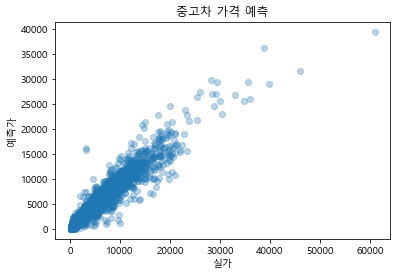

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, mlr_pred, alpha=0.3)
plt.xlabel("실가")
plt.ylabel("예측가")
plt.title("중고차 가격 예측")
plt.show()

In [48]:
print(mlr.coef_)

[ 0.02179245 15.04764822  0.55875314  0.44607827]


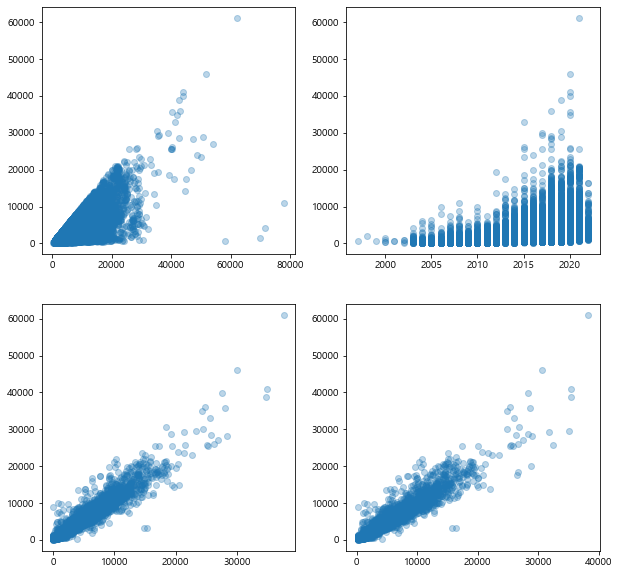

In [49]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].scatter(df[['new_price']], df[['price']], alpha=0.3)
axes[0,1].scatter(df[['year']], df[['price']], alpha=0.3)
axes[1,0].scatter(df[['forecast_min']], df[['price']], alpha=0.3)
axes[1,1].scatter(df[['forecast_max']], df[['price']], alpha=0.3)

plt.show()

0.9600545732679194


c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


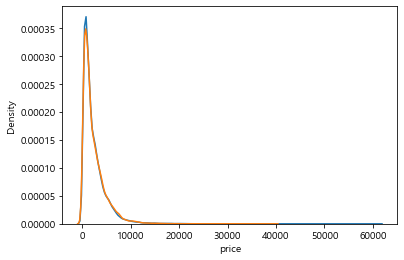

In [53]:
import seaborn as sns

relation_square = mlr.score(X_train, y_train)
print(relation_square)

ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(mlr_pred, hist = False, label = 'y예측')
plt.show()